In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("kaggle_movie_train.csv")

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df = df[~df['genre'].isin(['romance', 'other', 'adventure'])]

In [5]:
df.shape

(22099, 3)

In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [7]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

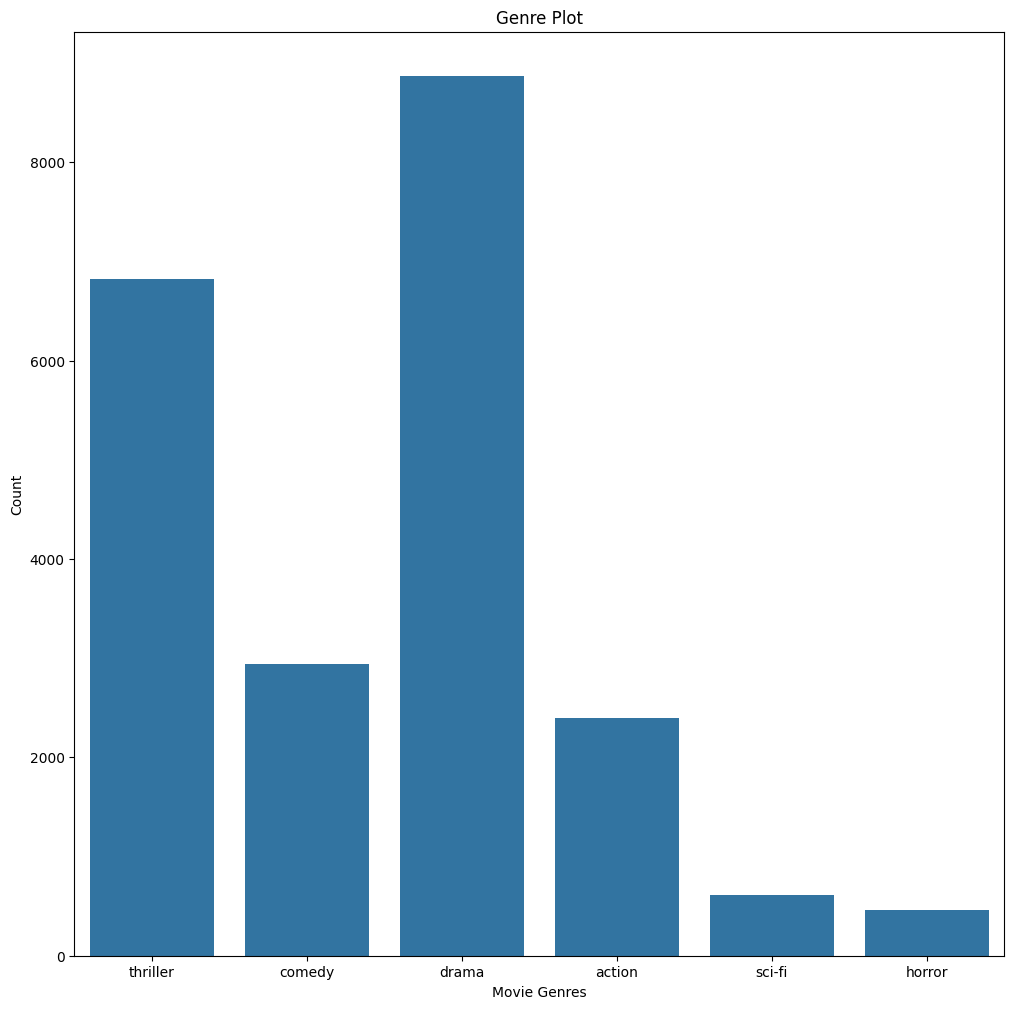

In [8]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [9]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action', 'comedy', 'drama', 'horror', 'sci-fi', 'thriller']

In [10]:
# Mapping the genres to values
genre_mapper = { 'action': 0 ,'comedy':1, 'drama':2, 'horror':3, 'sci-fi':4, 'thriller': 5}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",5
1,2,"t, summa cum laude and all. And I'm about to l...",1
2,3,"up Come, I have a surprise.... She takes him ...",2
3,4,ded by the two detectives. INT. JEFF'S APARTME...,5
4,5,"nd dismounts, just as the other children reach...",2
5,6,breadth of the bluff. Gabe pulls out his ancie...,5
6,7,uilding. A MAN in pajamas runs out into the ra...,5
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,2
8,10,"Memphis goes back into the garage, Budgy cack...",5
9,11,e reels as the world spins. Sweat pours off hi...,0


In [11]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [17]:
df

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",5
1,"t, summa cum laude and all. And I'm about to l...",1
2,"up Come, I have a surprise.... She takes him ...",2
3,ded by the two detectives. INT. JEFF'S APARTME...,5
4,"nd dismounts, just as the other children reach...",2
...,...,...
22574,n in the world to decide what I'm going to do ...,2
22575,shards. BOJO LAZ! Laz pushes Deke back through...,2
22576,"OTTIE You've got a thing about Ernie's, haven'...",5
22577,....with marked skill and dexterity . LANA wry...,0


In [13]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.shape

(22099, 2)

In [18]:
# Cleaning the text
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


nltk.download('wordnet')
nltk.download('omw-1.4')



corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
  
  lemmatizer = WordNetLemmatizer()
  lemmas = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in dialog_words]

  # Stemming the words
  words = [ps.stem(word) for word in lemmas]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


KeyError: 90

In [ ]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli get new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [ ]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [ ]:
len(corpus)

22579

In [ ]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

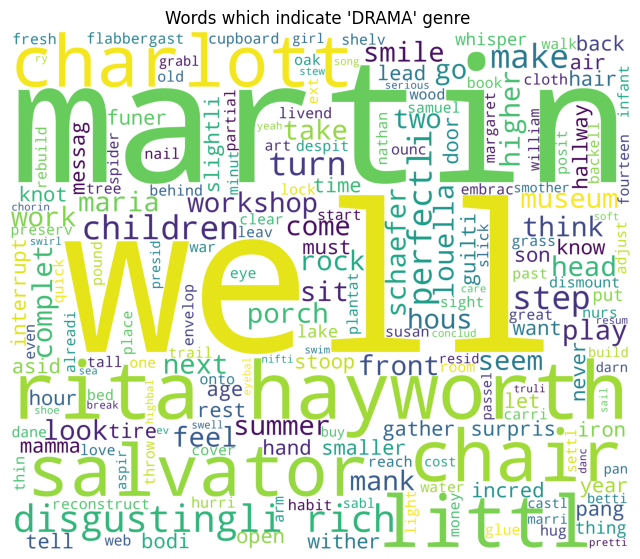

In [ ]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

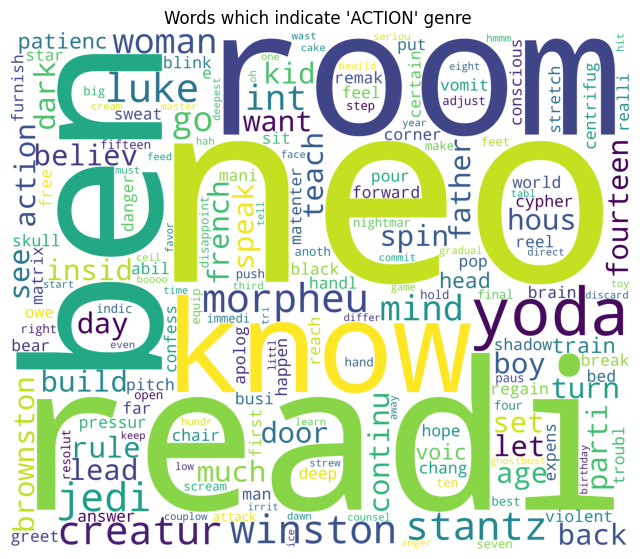

In [ ]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

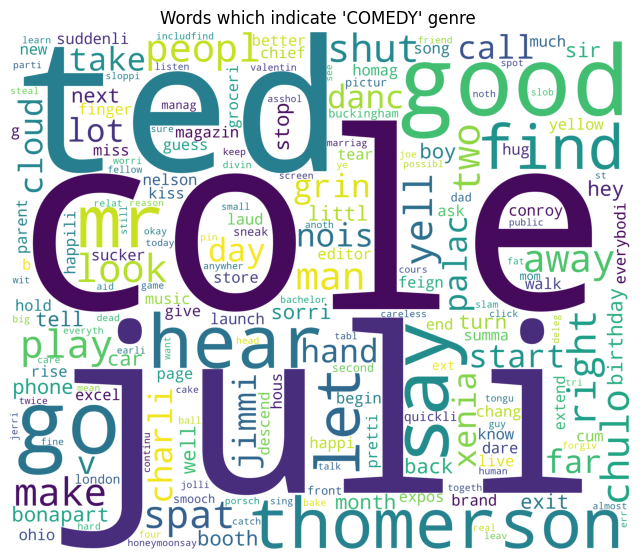

In [ ]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = df['genre'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)



<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong> Multinomial Naive Bayes </strong></p> 


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

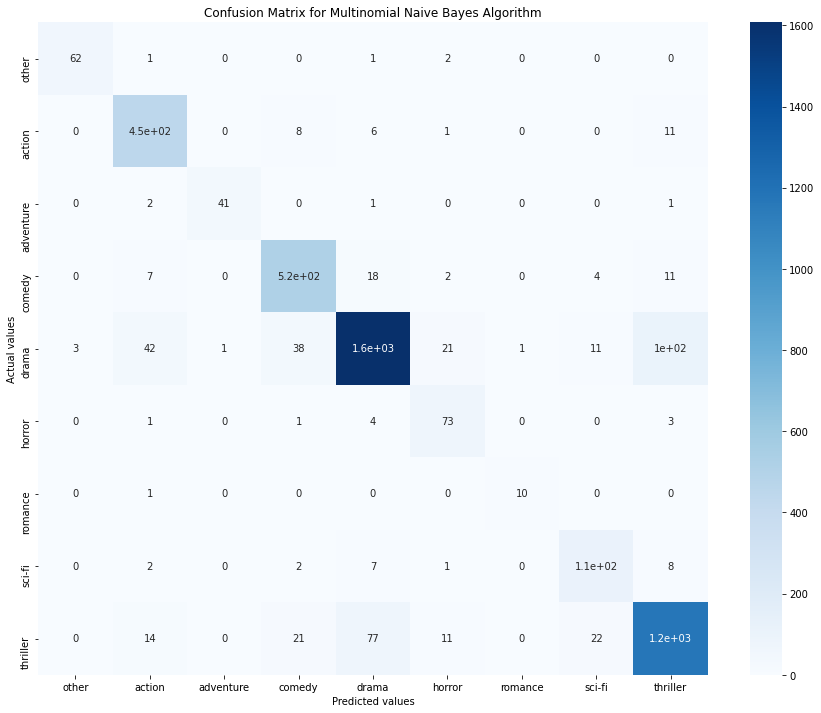

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [ ]:
# For generating random integer
from random import randint

In [ ]:
# Loading test dataset
test = pd.read_csv("../input/movie-genre-data/kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [ ]:
test.shape

(5589, 2)

In [ ]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: o Levi off the record for a second? OSBORNE Good idea. Smiling, she stops the tape. Then turns to Kendall. OSBORNE You and Dunbar got your stories straight. Little details, little inconsistencies, designed to bounce us back from one of you to the other, asking questions, killing time, until the transport arrives and whisks you away to where Senator Daddy can protect you. You think you're just going to slide out of this? You're an accessory to murder, Levi, you're going to jail KENDALL You can't threaten me HARDY Jail if he's lucky, the gas chamber if he's not KENDALL I didn't do anything Osborne laughs. OSBORNE It doesn't matter, Levi. We're going to find those bodies and when we do, I'm going to make sure one of them has a bullet in them that matches your weapon KENDALL What? HARDY That's a fantastic idea OSBORNE See, I just take your gun to the morgue and fire it into one of their skulls then I call every newspaper in the country with the story about how Senator Kendall's gay

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ll of a sudden... DISSOLVE TO INT. JERRY SPRINGER SET DAY JERRY SPRINGER talks INTO CAMERA from the audience. LISA V.O. It's on Jerry fuckin' Springer! JERRY SPRINGER ...today, we'll meet a growing number of transvestites who don't just like to dress up as women, they like to dress as pregnant women. When we return, Transvestites with a Twist. ON STAGE TWO TOUGH LOOKING MEN, dressed as pregnant women, stare out at the audience. LISA V.O. alternate line I'm not talking Maury or Leeza. This thing was definitely huge! EXT. NEIGHBORHOOD STREETS DAY A POLICE CAR with TWO OFFICERS cruises a neighborhood street. They pass DONUTS back and forth to each other. Through their windscreen, we see TWO SMALL CHILDREN WEARING WENDY MASKS playing cops and robbers. ROBIN QUIVERS V.O. In other news...oh, did you hear about the six armed Betty Dolls that robbed a bank the other day? HOWARD STERN V.O. Oh man, that's so my fantasy life size Bettys tellin' me what to do. Get down on the ground, you f

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: hese people that we're friendly. That this whole thing was a mistake. Is anyone trying to contact the ship? FOX ignores this Shermin, I want you and Bell to start looking for the one on the ground. SHERMIN We'll need a lot of help, George. You could hide an army up here. FOX I'm going to the White House right now. I'll try and get you everything you need. SHERMIN Wait, wait... What are my orders if we find this thing? Fox sits silently for a second. FOX Contain it and get back to me. SHERMIN What do you mean by 'contain?' Fox knows Shermin is looking for a definite order. FOX Just what I said. The television screen is reduced to static. Shermin stares at it blankly then Lyman turns it off. EXT. HOUSING TRACT MORNING The lift off of Shermin's helicopter reveals contamination suited scientists slipping the dead extraterrestrial's coffin into the Air Force helicopter. EXT. WOODS DAY The STAR MAN, still in his life support suit, looks surreal in the twilight world under the canopy 

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: 's Pat Verona? The one who was gone for a year? I heard he was doing porn movies. KAT I'm sure he's completely incapable of doing anything that interesting. MANDELLA He always look so KAT Block E? Kat turns back to face Mandella and forces her yogurt into Mandella's hand. KAT continuing Mandella, eat. Starving yourself is a very slow way to die. MANDELLA Just a little. She eats. Kat sees her wrist KAT What's this? MANDELLA An attempted slit. Kat stares at her, expressionless. KAT I realize that the men of this fine institution are severely lacking, but killing yourself so you can be with William Shakespeare is beyond the scope of normal teenage obsessions. You're venturing far past daytime talk show fodder and entering the world of those who need very expensive therapy. MANDELLA But imagine the things he'd say during sex. Thinks a minute KAT Okay, say you do it. You kill yourself, you end up in wherever you end up and he's there. Do you really think he's gonna wanna dace a nine

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  need a chain like that? MR. DUDLEY That's a good question. What is it about fences? Sometimes a locked chain makes people on both sides of the fence just a little more comfortable. Why would that be? He unwinds the enormous chain, heavy turn after heavy turn. The gates swing in, revealing HILL HOUSE. NELL Is there something about the house? MR. DUDLEY Mrs. Dudley'll be waiting for you. Grinning, Dudley steps aside and Nell rolls through. And at that he just grins wider. Nell pulls away. Disturbed, she watches him in the rearview mirror. She turns and in front of her sprawls Hill House. At center, the features of the oldest part of the House dwarf all others towering, eye like windows and the jaws of a Grand Entry with carved ebony doors. EXT. HILL HOUSE DRIVEWAY DAY The car rumbles up the drive toward the carport. INT. NELL'S CAR DAY Nell stops the car in front of the entrance, right inside the carport. In the silence all we can hear is her breathing. EXT. HILL HOUSE DAY Her c